# Exercise 1

### import required modules

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.basemap import Basemap
from random import randint
import numpy as np

#### read the dataset

In [18]:
df = pd.read_excel(r"C:\Users\ASUS\Desktop\python-\Exercise1(Iran's cities)\ir.xlsx")
df.drop(columns = ['admin_name', 'population_proper', 'capital', 'country', 'iso2'] , inplace= True)
df.dropna(inplace= True)

In [19]:
df1 = df.iloc[:10] #cities with max population

### first method:

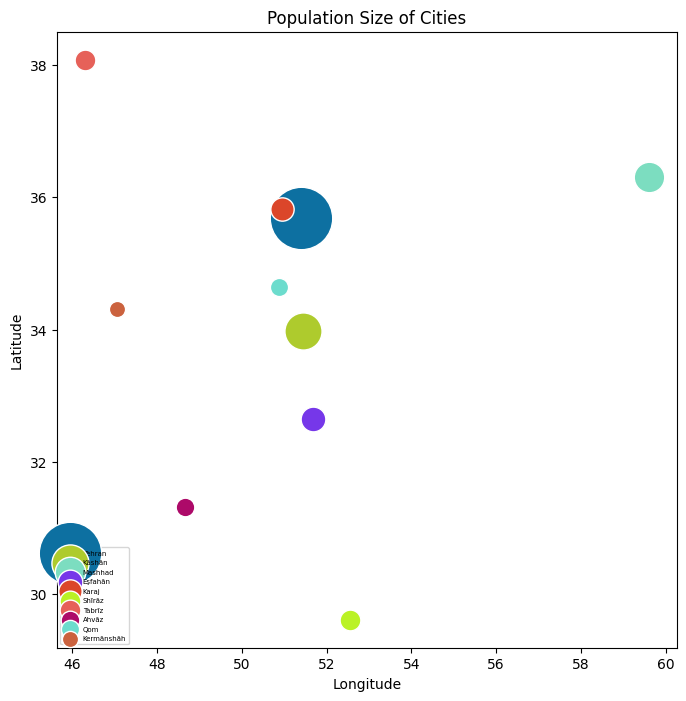

In [22]:
np.random.seed(42)
plt.figure(figsize=(8,8))
color = ['#%06X' % randint(0, 0xFFFFFF) for _ in range(117)]

for i, city in enumerate(df1['city']):
    plt.scatter(df1.loc[i, 'lng'], df1.loc[i, 'lat'], s=df1.loc[i,'population']/7000, c=color[i], alpha=1, edgecolors='white', label=city)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Population Size of Cities')
plt.legend(loc = 'lower left', prop = { "size": 5 })
plt.show()

### second method

#### plot populations in Iran's map

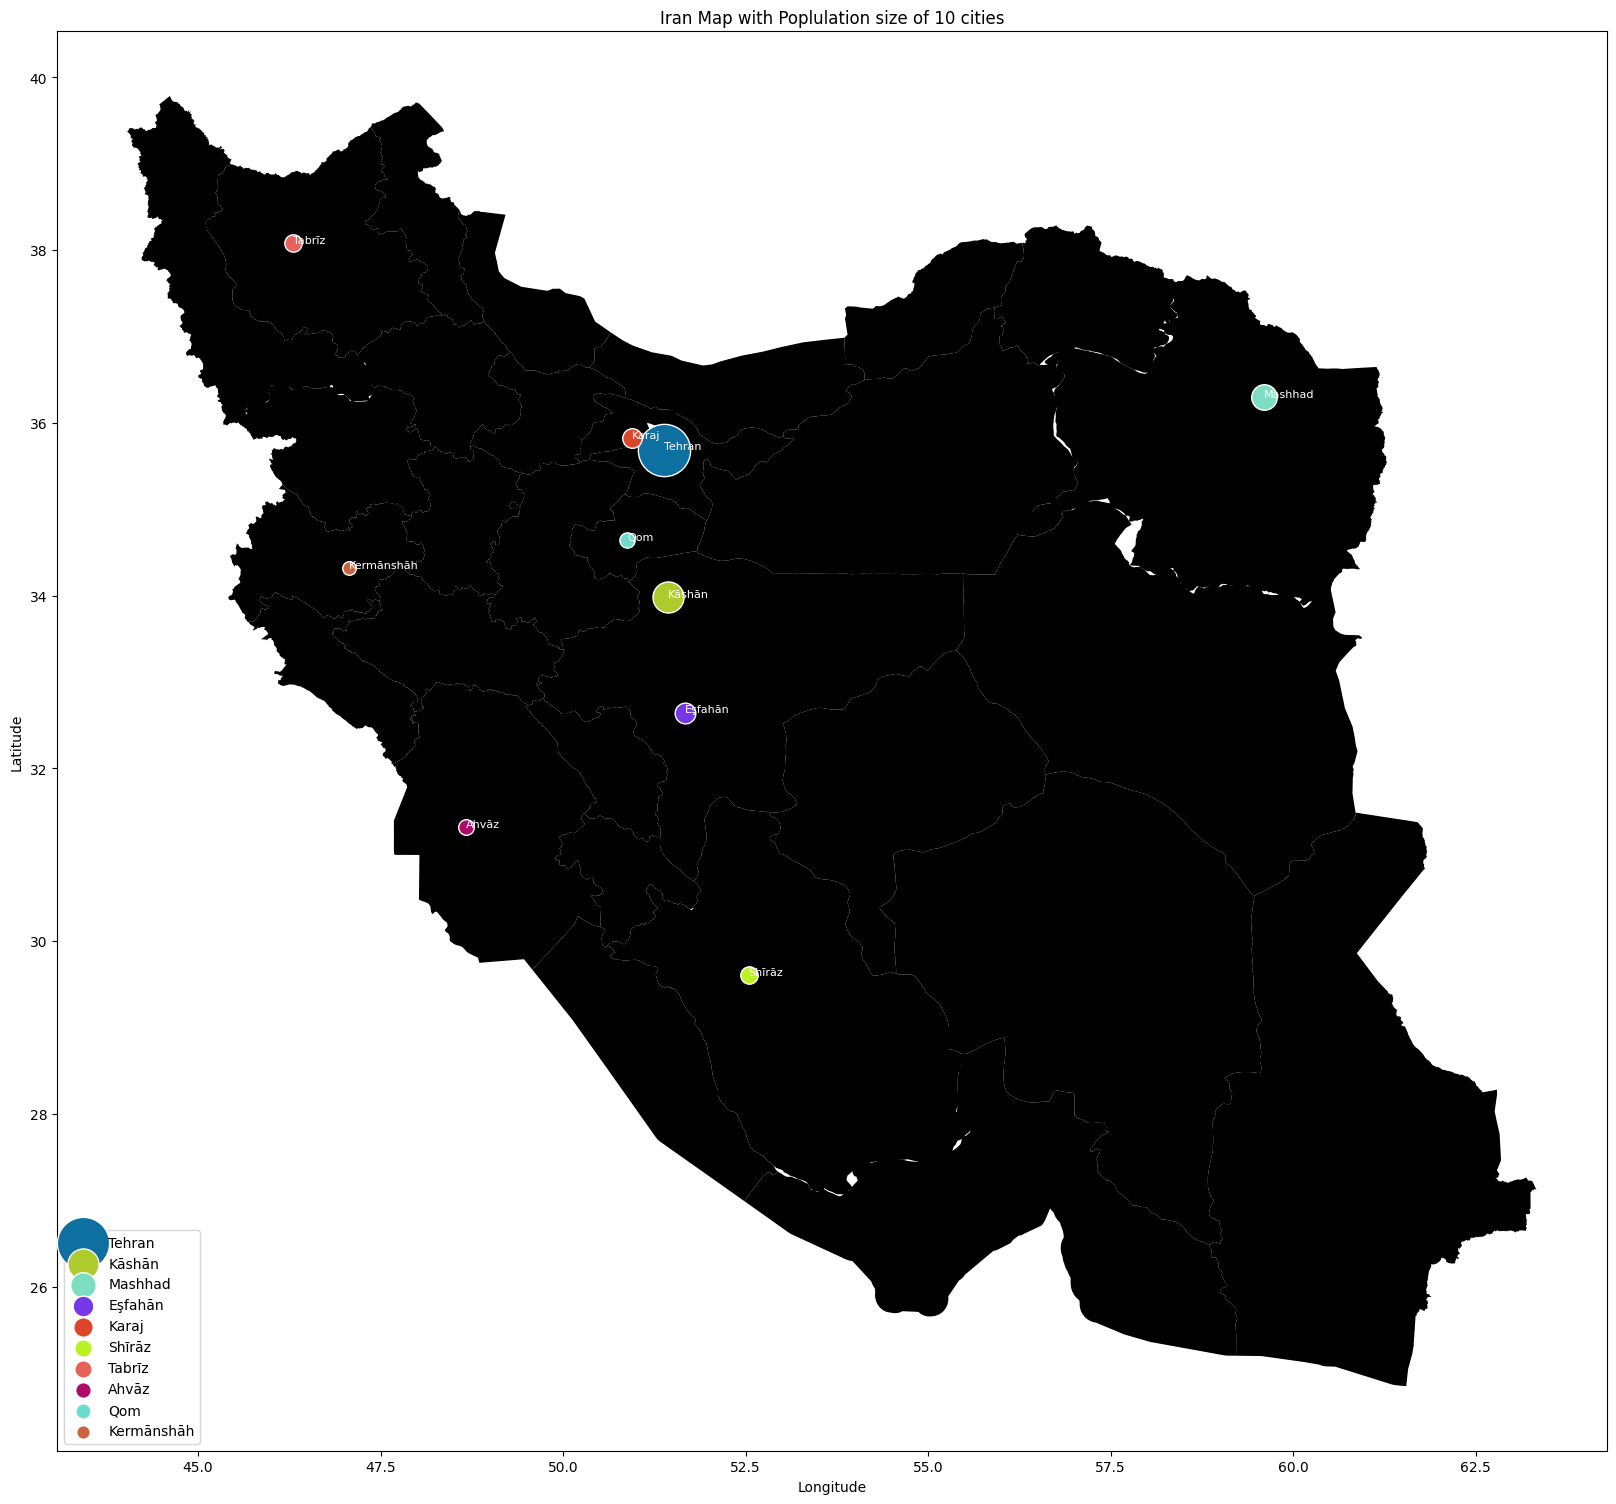

In [31]:
iran_admin_boundaries = gpd.read_file(r"C:\Users\ASUS\Desktop\python-\Exercise1(Iran's cities)\iran-with-regions_1457.geojson")

fig, ax = plt.subplots(figsize=(20,20))

iran_admin_boundaries.plot(ax=ax , color = 'black')


for i, city in enumerate(df1['city']):
    plt.scatter(df1.loc[i, 'lng'], df1.loc[i, 'lat'], s=df1.loc[i,'population']/10000, c=color[i], edgecolors='white', label=city)
    plt.text(df1.loc[i, 'lng'], df1.loc[i, 'lat'],city, fontsize=8, c = 'white')

# cmap = plt.colormaps["hsv"]
# fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap),ax=ax)

plt.title('Iran Map with Poplulation size of 10 cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'lower left', prop = { "size": 10 })
plt.show()

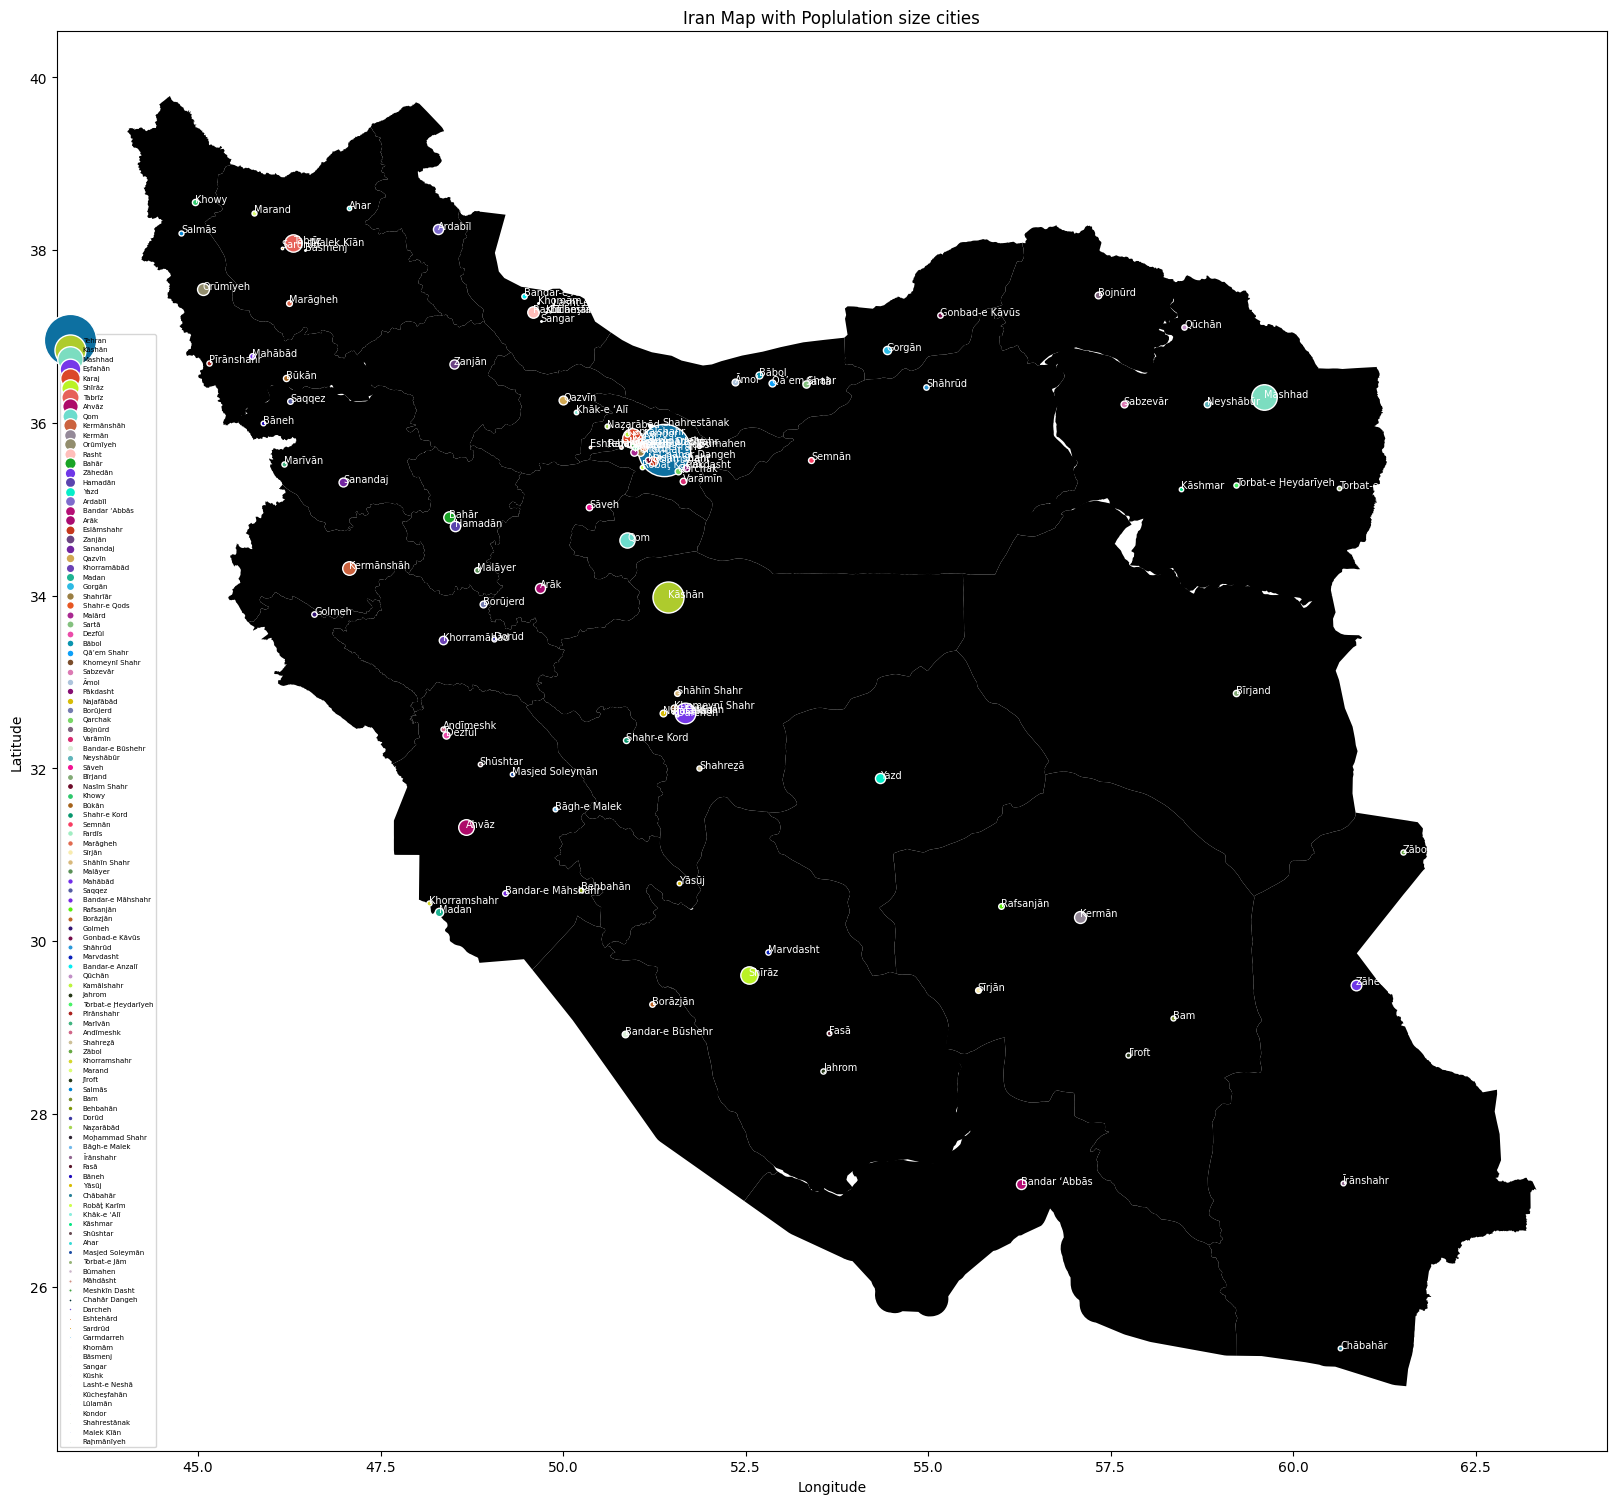

In [30]:
#for all cities

fig, ax = plt.subplots(figsize=(20,20))

iran_admin_boundaries.plot(ax=ax , color = 'black')


for i, city in enumerate(df['city']):
    plt.scatter(df.loc[i, 'lng'], df.loc[i, 'lat'], s=df.loc[i,'population']/10000, c=color[i], edgecolors='white', label=city)
    plt.text(df.loc[i, 'lng'], df.loc[i, 'lat'],city, fontsize=7, c = 'white')

# cmap = plt.colormaps["hsv"]
# fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(0, 1), cmap=cmap),ax=ax)

plt.title('Iran Map with Poplulation size cities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc = 'lower left', prop = { "size": 5 })
plt.show()

#### showing these 10 cities in world's map

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


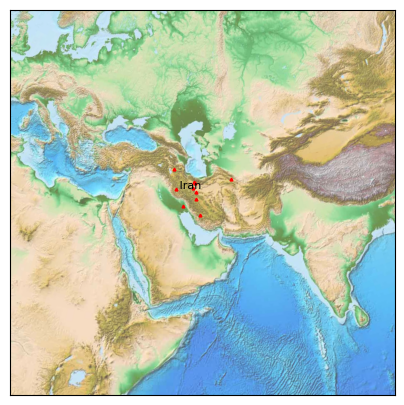

In [27]:
fig = plt.figure(figsize=(5,5))

m2 = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6,lat_0=32, lon_0=53)
m2.etopo(scale=1, alpha=0.7)


for i, city in enumerate(df1['city']):
    x, y = m2(df1.loc[i, 'lng'], df1.loc[i, 'lat'])
    plt.plot(x, y, 'r^', markersize=2)

plt.text(x,y,' Iran', fontsize=8)
plt.show()

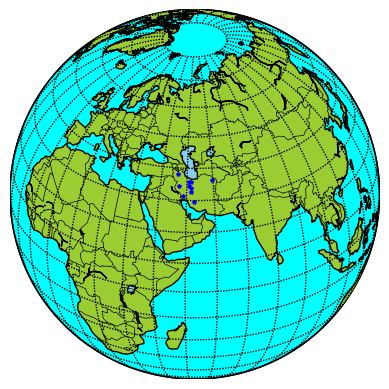

In [35]:
m = Basemap(projection='ortho', lat_0=32, lon_0=53, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')

m.fillcontinents(color='yellowgreen',lake_color='skyblue')

m.drawparallels(range(-90, 91, 10))
m.drawmeridians(range(0, 360, 10))


for i, city in enumerate(df1['city']):
    x, y = m(df1.loc[i, 'lng'], df1.loc[i, 'lat'])
    plt.plot(x, y, 'b*', markersize=3)